In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

## ROC Curve i AUC

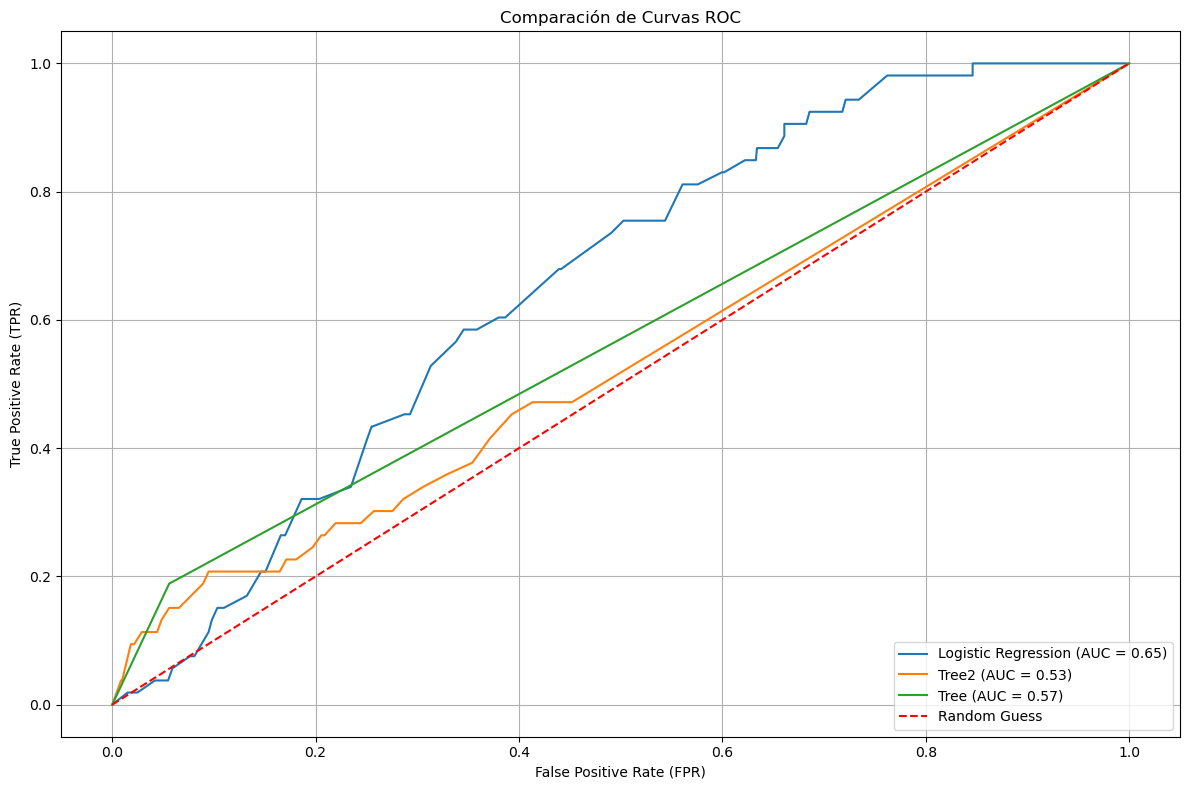

In [9]:
output_dir="ROC_Data"

if not os.path.exists(output_dir):
    print("La carpeta no existeix")

# Buscar los archivos correspondientes a FPR y TPR de cada modelo
roc_files = [f for f in os.listdir(output_dir) if f.endswith('_fpr.npy')]
if not roc_files:
    print("No s'han trobat.")

plt.figure(figsize=(12, 8))
for roc_file in roc_files:
    #Nom del model 
    model_name = roc_file.replace('_fpr.npy', '')

    #Carregar les dades
    fpr = np.load(os.path.join(output_dir, f"{model_name}_fpr.npy"))
    tpr = np.load(os.path.join(output_dir, f"{model_name}_tpr.npy"))
    auc = np.load(os.path.join(output_dir, f"{model_name}_auc.npy"))[0]

    #Afegir la corba al gràfic
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc:.2f})")

#Afegir la línea aleatòria
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')

plt.title('Comparación de Curvas ROC')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()

plt.show()
